In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# def testMLP(x_train, y_train, x_test, y_test):
# Preprocess the data
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# One-hot encode the labels
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),  # 128 neurons in the first hidden layer
    Dense(64, activation='relu'),  # 64 neurons in the second hidden layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128)



Epoch 1/5


469/469 [==============================] - 3s 4ms/step - loss: 0.3472 - accuracy: 0.9039
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1388 - accuracy: 0.9585
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0989 - accuracy: 0.9711
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0754 - accuracy: 0.9773
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0598 - accuracy: 0.9820


In [4]:
# # Load the MNIST dataset
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# testMLP(x_train, y_train, x_test, y_test)

In [5]:
# Get the layer outputs for the test data
layer_outputs = []
for layer in model.layers:
    if hasattr(layer, 'output'):
        layer_model = tf.keras.Model(inputs=model.input, outputs=layer.output)
        layer_outputs.append(layer_model.predict(x_test))

# Compute the neuron activations averaged for each label
num_layers = len(layer_outputs)
num_neurons = sum(outputs.shape[-1] for outputs in layer_outputs)
neuron_activations = np.zeros((num_classes, num_neurons))

for label_idx in range(num_classes):
    label_test_data = x_test[np.argmax(y_test, axis=1) == label_idx]
    label_activations = np.zeros((num_neurons,))
    neuron_idx = 0
    for j, outputs in enumerate(layer_outputs):
        num_neurons_in_layer = outputs.shape[-1]
        label_activations[neuron_idx:neuron_idx + num_neurons_in_layer] = np.mean(outputs[np.argmax(y_test, axis=1) == label_idx], axis=0)
        neuron_idx += num_neurons_in_layer
    neuron_activations[label_idx] = label_activations


# Print the neuron activations matrix
print(neuron_activations)

313/313 [==============================] - 1s 2ms/step
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.48883874e-03
  4.35285969e-03 2.55673425e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.16595775e-03
  1.74833853e-02 1.77855953e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.66692100e-02
  2.16209274e-02 3.18563427e-04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.66891229e-01
  8.02291464e-03 5.00373822e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.98891480e-03
  9.73794818e-01 5.46306837e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.99771896e-02
  2.50768419e-02 8.84861588e-01]]


In [6]:
len(neuron_activations)

10

<Figure size 1200x1200 with 0 Axes>

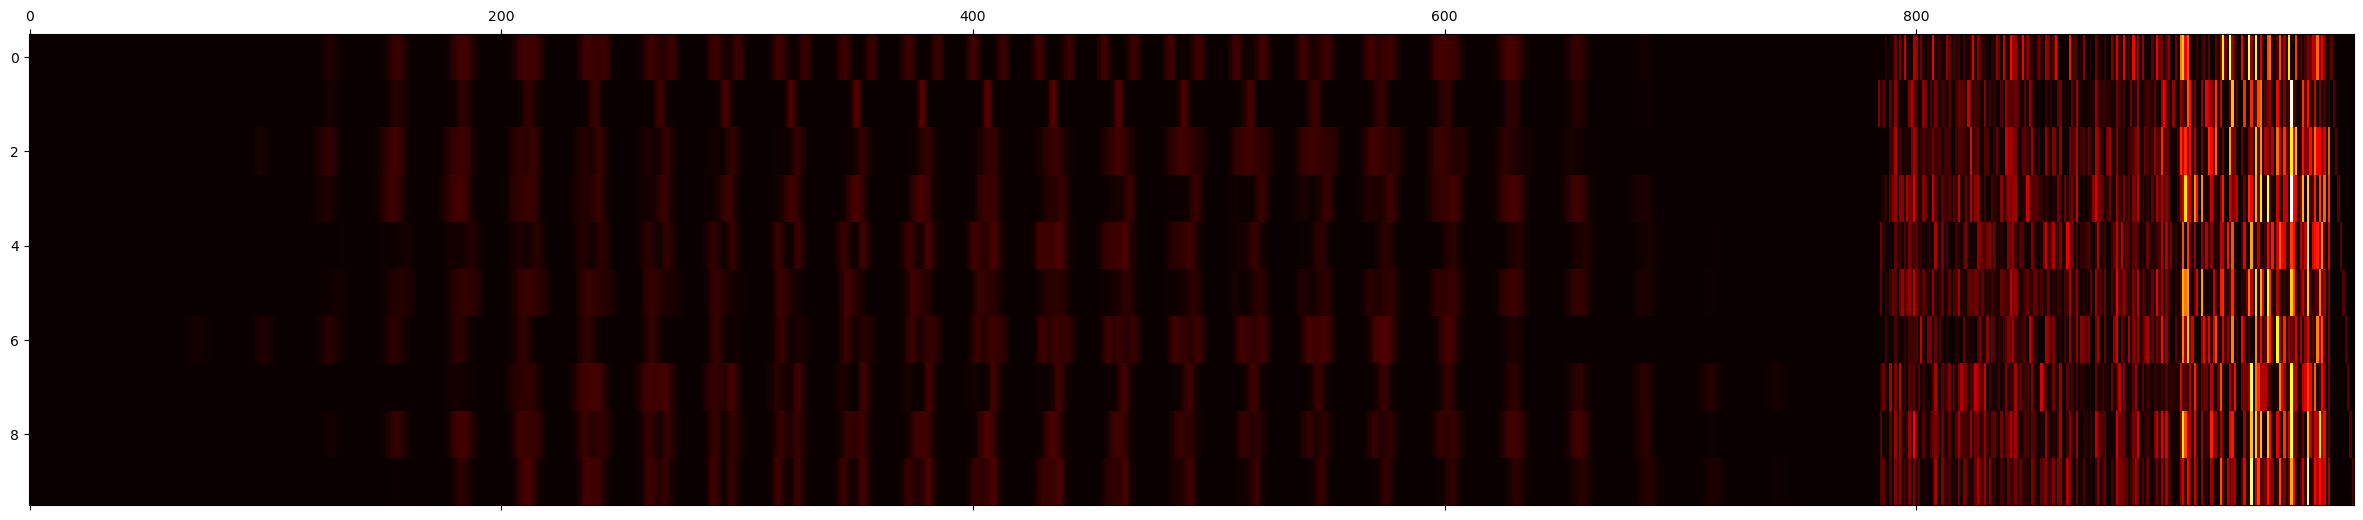

In [7]:
#plot the matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))  # Set the initial figure size
plt.matshow(neuron_activations, cmap='hot', interpolation='nearest', aspect=20)
plt.gcf().set_figheight(12)
plt.gcf().set_figwidth(30)
plt.show()


In [8]:
# Get the layer outputs for the test data
layer_outputs = []
for layer in model.layers:
    if hasattr(layer, 'output'):
        layer_model = tf.keras.Model(inputs=model.input, outputs=layer.output)
        layer_outputs.append(layer_model.predict(x_test))

# Compute the neuron activations averaged for each label and each layer
layer_activations = []
for outputs in layer_outputs:
    num_neurons_in_layer = outputs.shape[-1]
    layer_activation = np.zeros((num_classes, num_neurons_in_layer))
    for label_idx in range(num_classes):
        layer_activation[label_idx] = np.mean(outputs[np.argmax(y_test, axis=1) == label_idx], axis=0)
    layer_activations.append(layer_activation)

# Print the neuron activations matrix for each layer
# for i, layer_activation in enumerate(layer_activations):
#     print(f"Layer {i} neuron activations:")
#     print(layer_activation)
#     print()

313/313 [==============================] - 1s 2ms/step


In [ ]:
#plot the matrix
import matplotlib.pyplot as plt

for layer in layer_activations:
    plt.figure(figsize=(12, 12))  # Set the initial figure size
    plt.matshow(layer, cmap='hot', interpolation='nearest', aspect=20)
    plt.gcf().set_figheight(12)
    plt.gcf().set_figwidth(30)
    plt.show() 

Now I am going o go on a side track. Here my vision is to create a "Phantom 4" Where I perform data augmentation to remove the stalks from the 4s and then prove that I can sill recover the 4s with high accuracy using the ablation to elarn the stalk identification fromt the mean activation using PCA.

In [10]:
type(layer_activations)

list

In [11]:
# Here I am going to graph the initial 4 activation before I start
just_4 = []
just_7 = []

max_len = max(len(layer) for layer in layer_activations)  # Find the maximum length

for layer in layer_activations:
    padded_layer = np.pad(layer, (0, max_len - len(layer)), 'constant', constant_values=0)  # Pad the layer
    just_4.append(padded_layer[4])
    just_7.append(padded_layer[7])

In [12]:
# Find the maximum length of any list in just_4
max_len = max(len(lst) for lst in just_4)

# Pad each list in just_4 to make them the same length
just_4_padded = [np.pad(lst, (0, max_len - len(lst)), 'constant', constant_values=0) for lst in just_4]

# Convert the padded list of lists to a numpy array
just_4_array = np.array(just_4_padded)

In [ ]:
# Create a heatmap
plt.imshow(just_4_array, cmap='hot', interpolation='nearest', aspect=100)
plt.colorbar()  # Show color scale
plt.gcf().set_figheight(10)
plt.gcf().set_figwidth(20)
plt.ylabel('Layers')
plt.xlabel('Neurons')
plt.show()